Importing libraries
1

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np

Reading Dataset

In [52]:
train_data = pd.read_csv('Datasets/Train_Data.csv')
test_data = pd.read_csv('Datasets/Test_Data.csv')
print(train_data.head())

   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0     6.800000         0.037490   48.6034                       2004   
1    15.600000         0.172597  114.8518                       1997   
2    12.911575         0.054721  107.8254                       1985   
3    11.800000         0.098312   81.4618                       1998   
4    17.850000         0.046600  125.1388                       2004   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0           291.6204                    0                         1   
1          2163.1842                    0                         1   
2          2387.5588                    0                         1   
3           161.1236                    0                         1   
4          1981.4208                    0                         0   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg  \
0                         0                         0        

In [53]:
# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)


Shape of training data : (1364, 36)

Shape of testing data : (341, 36)


Handling Missing Values

In [54]:
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']

In [55]:
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

In [56]:
model = LinearRegression()

In [57]:
# fit the model with the training data
model.fit(train_x,train_y)

LinearRegression()

Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale the features
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Fit the model with scaled data
model.fit(train_x_scaled, train_y)

LinearRegression()

In [59]:
# Get feature names
feature_names = train_x.columns

In [60]:
# Coefficients of the trained model with feature names
coefficients = pd.DataFrame(model.coef_, index=feature_names, columns=['Coefficient'])
print('\nCoefficients of model with feature names:\n', coefficients)


Coefficients of model with feature names:
                                   Coefficient
Item_Weight                     -1.584456e+01
Item_Visibility                 -5.723150e+00
Item_MRP                         1.010530e+03
Outlet_Establishment_Year        4.924074e+02
Item_Fat_Content_LF             -4.706524e+14
Item_Fat_Content_Low Fat        -1.175688e+15
Item_Fat_Content_Regular        -1.135863e+15
Item_Fat_Content_low fat        -2.654345e+14
Item_Fat_Content_reg            -2.576048e+14
Item_Type_Baking Goods           4.191728e+15
Item_Type_Breads                 2.543526e+15
Item_Type_Breakfast              1.400377e+15
Item_Type_Canned                 4.173567e+15
Item_Type_Dairy                  4.298442e+15
Item_Type_Frozen Foods           4.811284e+15
Item_Type_Fruits and Vegetables  5.457038e+15
Item_Type_Hard Drinks            2.180959e+15
Item_Type_Health and Hygiene     3.742945e+15
Item_Type_Household              4.796514e+15
Item_Type_Meat                   3.3

Regularization

In [61]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model with regularization parameter alpha
ridge_model = Ridge(alpha=0.5)

# Fit the Ridge model with training data
ridge_model.fit(train_x, train_y)

# Predictions using Ridge model
predict_train_ridge = ridge_model.predict(train_x)
predict_test_ridge = ridge_model.predict(test_x)

# RMSE with Ridge model
rmse_train_ridge = mean_squared_error(train_y, predict_train_ridge)**0.5
rmse_test_ridge = mean_squared_error(test_y, predict_test_ridge)**0.5
print('\nRMSE on train dataset (Ridge): ', rmse_train_ridge)
print('\nRMSE on test dataset (Ridge): ', rmse_test_ridge)


RMSE on train dataset (Ridge):  1136.0330758607415

RMSE on test dataset (Ridge):  1006.7923289026187


Cross validation

In [62]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, train_x, train_y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.59704621 0.52508974 0.62243874 0.56477107 0.52409081]
Mean cross-validation score: 0.5666873140713674


In [63]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)


Coefficient of model : [-1.58445625e+01 -5.72315029e+00  1.01053004e+03  4.92407404e+02
 -4.70652374e+14 -1.17568821e+15 -1.13586317e+15 -2.65434484e+14
 -2.57604843e+14  4.19172834e+15  2.54352610e+15  1.40037747e+15
  4.17356700e+15  4.29844180e+15  4.81128448e+15  5.45703799e+15
  2.18095880e+15  3.74294535e+15  4.79651411e+15  3.38382009e+15
  2.14098984e+15  1.57808640e+15  5.42139092e+15  3.59140682e+15
  2.29635177e+15  4.46735316e+02  8.06512271e+01  1.68117996e+01
 -1.83580398e+16 -1.89649311e+16 -1.96936630e+16  5.33695707e+15
  7.62912436e+15  4.97768679e+15  4.91610479e+15]


In [64]:
# intercept of the model
print('\nIntercept of model',model.intercept_)


Intercept of model 2238.239452262422


In [65]:
# Predict the target on the training dataset using scaled features
predict_train = model.predict(train_x_scaled)
print('\nItem_Outlet_Sales on training data:', predict_train)


Item_Outlet_Sales on training data: [ 810.23945226 1765.23945226 3274.23945226 ...  847.48945226 2332.23945226
 2409.48945226]


In [66]:
# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  1136.0434669534259


In [67]:
# predict the target on the testing dataset
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test)


Item_Outlet_Sales on test data [-7.05445694e+15 -8.21305313e+15 -7.01463190e+15 -6.40774060e+15
 -7.56633678e+15 -7.09331914e+15 -9.49728151e+15 -1.12384654e+16
 -6.44756563e+15 -1.07211097e+16 -7.05349410e+15 -1.00050426e+16
 -9.38548643e+15 -5.74252980e+15 -8.76854958e+15 -1.43751600e+16
 -7.66038541e+15 -1.03948014e+16 -7.77901090e+15 -8.29810289e+15
 -7.09010401e+15 -1.04702735e+16 -9.08784980e+15 -1.16149796e+16
 -1.09334085e+16 -7.05445694e+15 -7.56633678e+15 -1.10405549e+16
 -7.05349410e+15 -7.78318887e+15 -7.66038541e+15 -7.66038541e+15
 -8.92008812e+15 -1.13406658e+16 -6.48321270e+15 -7.66038541e+15
 -7.05445694e+15 -8.27994156e+15 -1.16782724e+16 -1.15533976e+16
 -1.22103011e+16 -1.03305361e+16 -9.89832911e+15 -1.08000141e+16
 -1.16782724e+16 -8.52078353e+15 -9.79117261e+15 -1.04702735e+16
 -8.31976660e+15 -1.00711782e+16 -1.16999361e+16 -7.05445694e+15
 -6.48321270e+15 -8.21305313e+15 -6.44756563e+15 -6.44756563e+15
 -1.03305361e+16 -8.21305313e+15 -7.69121159e+15 -6.483212

c:\Users\vamsi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Data Visualization

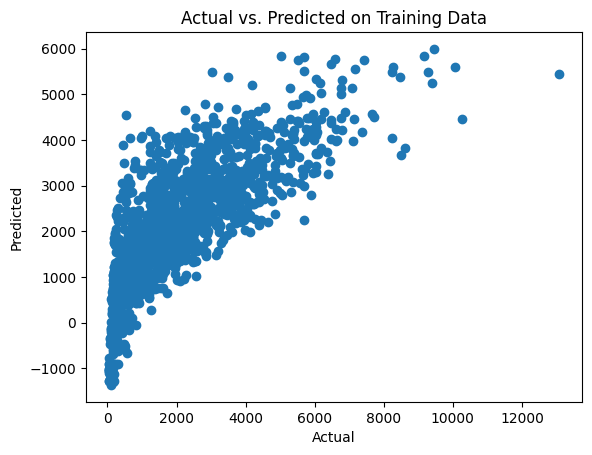

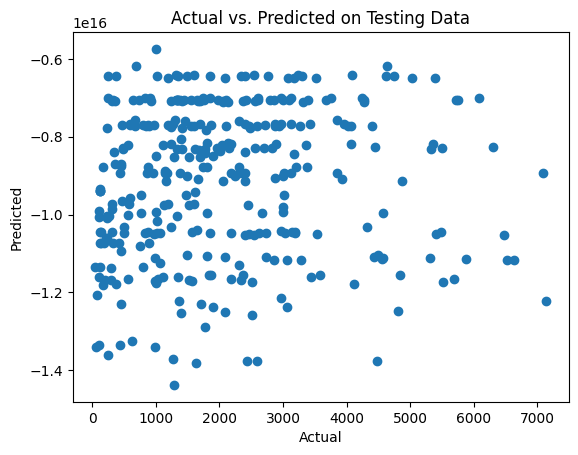

In [68]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values on training data
plt.scatter(train_y, predict_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted on Training Data")
plt.show()

# Scatter plot of actual vs. predicted values on testing data
plt.scatter(test_y, predict_test)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted on Testing Data")
plt.show()

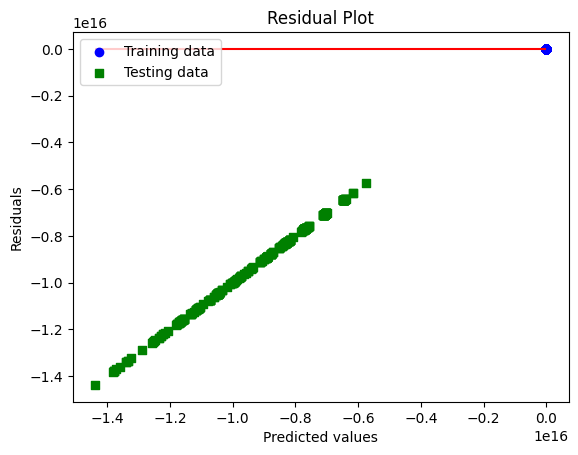

In [69]:
# Residual plot for training data
plt.scatter(predict_train, predict_train - train_y, c='blue', marker='o', label='Training data')
# Residual plot for testing data
plt.scatter(predict_test, predict_test - test_y, c='green', marker='s', label='Testing data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(predict_train.min(), predict_test.min()), xmax=max(predict_train.max(), predict_test.max()), color='red')
plt.show()

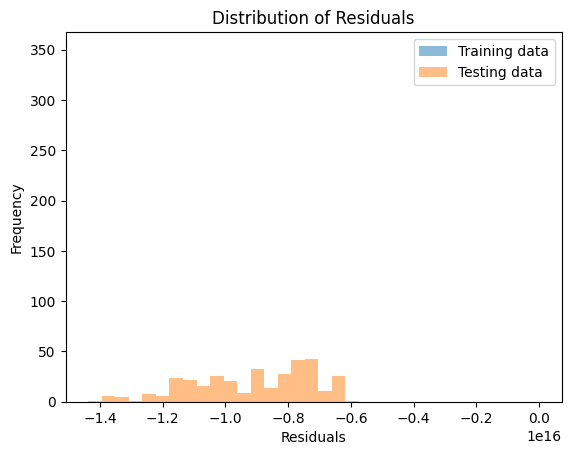

In [70]:
# Histogram of residuals for training data
plt.hist(predict_train - train_y, bins=20, alpha=0.5, label='Training data')
# Histogram of residuals for testing data
plt.hist(predict_test - test_y, bins=20, alpha=0.5, label='Testing data')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend(loc='upper right')
plt.show()

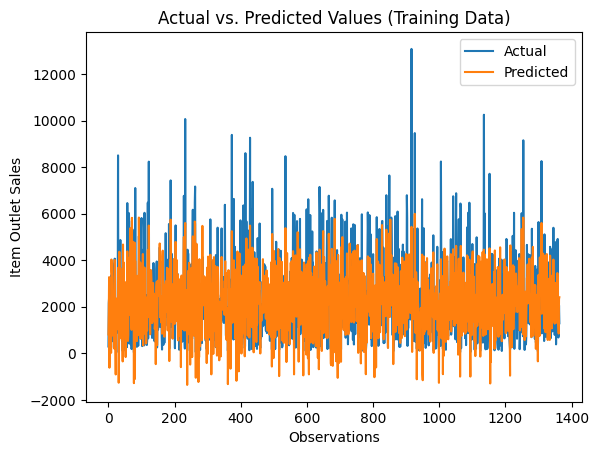

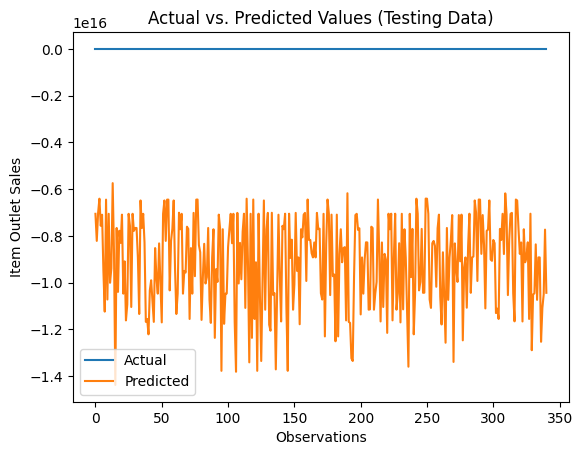

In [71]:
# Line plot of actual vs. predicted values for training data
plt.plot(train_y, label='Actual')
plt.plot(predict_train, label='Predicted')
plt.xlabel('Observations')
plt.ylabel('Item Outlet Sales')
plt.title('Actual vs. Predicted Values (Training Data)')
plt.legend()
plt.show()

# Line plot of actual vs. predicted values for testing data
plt.plot(test_y, label='Actual')
plt.plot(predict_test, label='Predicted')
plt.xlabel('Observations')
plt.ylabel('Item Outlet Sales')
plt.title('Actual vs. Predicted Values (Testing Data)')
plt.legend()
plt.show()

In [72]:
# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  9328663196210810.0


Saveing Model

In [73]:
# Save the trained model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)